<a href="https://colab.research.google.com/github/chrisjulio/INFO7017/blob/main/T2_2_Keras01_Christiano_Guilherme_Marcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#ff9900"> **MLP com Keras**</font>
---

<font color="#66ffff">**Keras**</font> (https://keras.io/) é uma biblioteca de rede neural de código aberto escrita em Python. É projetada para ser amigável ao usuário, modular e extensível, fornecendo uma interface de alto nível para construir e treinar modelos de aprendizado profundo. O Keras é construído em cima de outros *frameworks* populares de aprendizado profundo como `TensorFlow` (https://www.tensorflow.org/), Microsoft Cognitive Toolkit -`CNTK` (https://learn.microsoft.com/en-us/cognitive-toolkit/) e `Theano` (https://github.com/Theano/Theano), o que permite que ele aproveite o poder e desempenho desses *frameworks* enquanto fornece uma interface mais acessível e fácil de usar. Tais *frameworks* são o *backend* computacional do Keras.

O próprio `TensorFlow` vem com uma implementação particular do Keras, `tf.keras`. Há suporte apenas ao `TensorFlow` como *backend*, oferecendo a vantagem de suporte ao TensorFlow Data API.

Além das bibliotecas ``Numpy``, ``Pandas`` e ``Matplotlib``, vamos utilizar ``keras`` de ``tensorflow``.


In [ ]:
!pip install tensorflow
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow import keras

print(f'Keras:{keras.__version__}')  # version

import matplotlib.pyplot as plt

from tensorflow import keras

print(f'Keras:{keras.__version__}')  # version

Keras:3.8.0
Keras:3.8.0


Criação do Modelo
--

Vamos criar um modelo simples com duas hidden layers. Sequential é um modelo Keras composto de camadas empilhadas e conectadas sequencialmente entre si.

A primeira camada define uma entrada de 32 × 32 × 3, correspondente ao tamanho das imagens da base CIFAR-10 com 3 canais (RGB).

Em seguida, a camada Flatten() converte essa entrada tridimensional em um array unidimensional de 3072 valores (pois 32 × 32 × 3 = 3072). Isso prepara os dados para as camadas fully connected (Dense) que virão a seguir.

A próxima camada é uma camada densa com 300 neurônios e uma função de ativação. Essa função de ativação <font color="#66ffff">ReLU</font> (Rectified Linear Unit) é um rectifier. Foi apresentada por Kunihiko Fukushima (1969) no contexto de extração de visual features em redes neurais. A partir de 2011, tornou-se amplamente utilizada no treinamento de redes neurais profundas em substituição às funções sigmoid e hyperbolic tangent.


\begin{align}
  f(x) = x^+ = max(x, 0) = \left\{
        \begin{array}{cl}
             x & x \gt 0 \\
             0 & otherwise             
        \end{array}
        \right.
\end{align}

sendo $x$ o neurônio de entrada.

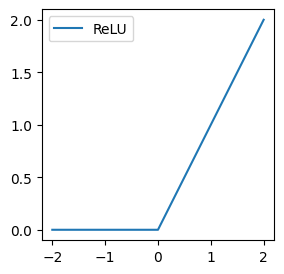

In [ ]:
def relu(x):
    return np.maximum(0, x)

x = np.linspace(start = -2, stop = 2, num = 41)

fig = plt.figure(figsize=(3, 3))
ax = plt.plot(x, relu(x), label='ReLU')

plt.legend(loc='upper left')

plt.show()

> A próxima camada também é uma densa com 100 neurônios e usa a função ReLU.

> Finalmente a última camada também é uma camada densa com 10 neurônios (um por classe do nosso problema). Como as classes são exclusivas, está sendo definida a função de ativação *softmax*, produzindo probabilidades.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

> O método ``summary()`` do objeto ``model`` exibe as camadas definidas no modelo. ``None``indica que o parâmetro *batch size* pode ser qualquer.

In [ ]:
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       921,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 953,010 (3.64 MB)

 Trainable params: 953,010 (3.64 MB)

 Non-trainable params: 0 (0.00 B)

None


As camadas do modelo podem ser acessadas individualmente.

In [ ]:
print(model.layers)

hidden1 = model.layers[1]  # first hidden layer

print(f'\nFirst hidden layer name:{hidden1.name}')

[<Flatten name=flatten_3, built=True>, <Dense name=dense_9, built=True>, <Dense name=dense_10, built=True>, <Dense name=dense_11, built=True>]

First hidden layer name:dense_9


E os parâmetros de uma camada pode ser obtidos com ``get_weights``.

Perceba os pesos (``weights``) inicializados randomicamente e os termos bias com zero.

In [ ]:
weights, biases = hidden1.get_weights()

print(f'Layer weights shape:\n{weights.shape}')
print(f'\nLayer weights:\n{weights}')

print(f'\nLayer biases shape:\n{biases.shape}')
print(f'\nBiases:\n{biases}')

Layer weights shape:
(3072, 300)

Layer weights:
[[ 0.03079002  0.01877651 -0.01989868 ... -0.02470293 -0.02346857
   0.02665101]
 [-0.03698308 -0.03980527  0.01779408 ...  0.0183831   0.01575157
  -0.01055227]
 [-0.02127641  0.03398467 -0.02587398 ...  0.02614018  0.02372941
  -0.01309135]
 ...
 [-0.03713493 -0.02453981  0.02869857 ... -0.02192002 -0.03970053
  -0.02979639]
 [-0.03876626 -0.03049705  0.00197996 ...  0.03933518  0.01678313
  -0.03159823]
 [ 0.0094953   0.01739766  0.00884667 ...  0.02123668 -0.00800151
   0.00673387]]

Layer biases shape:
(300,)

Biases:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

---

> 💡 **Nota**:
É importante destacar que as camadas densas possuem muitos parâmetros. Vejamos o caso da primeira hidden layer: são **3072 × 300** pesos mais 300 termos bias, totalizando **921.900** parâmetros! (dados do model.summary)

Essa quantidade enorme de parâmetros permite ao modelo ajustar-se de forma flexível aos dados de entrada, mas também pode levar ao overfitting, especialmente quando a quantidade de instâncias de treinamento é insuficiente ou quando o modelo não utiliza regularização adequada.

---

Importação de um *Dataset* e Análise Exploratória
--

Vamos usar o *dataset* <font color="#ff9900">**CIFAR-10** </font> (https://keras.io/api/datasets/cifar10/) que é uma coleção de 60.000 imagens coloridas (RGB), cada uma com tamanho de $32 \times 32$ pixels, divididos em **50.000 imagens de treino e 10.000 imagens de teste**. Formato de imagens em array NumPy + rótulos (labels) inteiros.

Ele é usado para classificação de imagens, em que o modelo aprende a associar uma imagem a uma das 10 classes. É considerado um desafio intermediário, por conter imagens pequenas, coloridas e com variações naturais (ângulo, iluminação, etc).


**Classes:**

* airplane (avião)

* automobile (carro)

* bird (pássaro)

* cat (gato)

* deer (veado)

* dog (cachorro)

* frog (sapo)

* horse (cavalo)

* ship (navio)

* truck (caminhão)


In [ ]:
from tensorflow.keras.datasets import cifar10
cifar10 = keras.datasets.cifar10

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Carregada a base, vamos investigar o conteúdo. Cada imagem é representada como um *array* $32 \times 32 \times 3$, onde os três canais correspondem às **cores vermelha, verde e azul (RGB)**. As intensidades de pixel variam de $0-255$ e são armazenadas como inteiros (uint8). **Devem ser normalizadas para valores entre 0 e 1** (floats) antes de treinar o modelo.

In [ ]:
print(f'Dataset shape:{X_train_full.shape}')

print(f'First instance shape:{X_train_full[0].shape}')
print(f'\nFirst instance:\n {X_train_full[0]}')

Dataset shape:(50000, 32, 32, 3)
First instance shape:(32, 32, 3)

First instance:
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


Mas o que é esse *array*? 🤔
Vamos exibi-lo como uma imagem usando ``plt.imshow``.


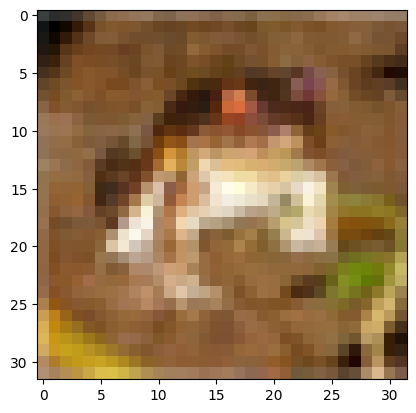

In [ ]:
fig = plt.imshow(X_train_full[0], cmap=plt.cm.gray)
plt.show()

Super! Parece qualquer coisa, não faço ideia do que seja kkkkkk.

Felizmente temos o rótulo de cada imagem (instância). Vamos mapear o códigos das rótulos para os nomes das classes.


---

Código abaixo está dividido em 4 partes:

1. Carregar a base

2. Ver rótulos como números inteiros

3. Mapear índices para nomes das classes

4. Extrair todos os rótulos como 1D array

In [ ]:
#1
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#2
print(y_train.shape)  # (50000, 1)
print(y_train[0])     # Ex: [6]

#3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Exemplo: mostrar o nome da classe da primeira imagem
print(f"Classe: {y_train[0][0]} → {class_names[y_train[0][0]]}")

#4
import numpy as np

y_train_flat = y_train.flatten()
print(y_train_flat[:5])  # Ex: [6 9 9 4 1]

(50000, 1)
[6]
Classe: 6 → frog
[6 9 9 4 1]


Ah, então se trata de um sapo!!! 🐸

Vamos exibir algumas instâncias. Lembrando que os códigos dos rótulos estão em ``y_train_full``.

In [ ]:
print(f'Class name of first instance: {class_names[y_train_full[0][0]]}')

Class name of first instance: frog


Com isso vamos gerar uma grade para visualizar as 25 primeiras instâncias do dataset `X_train_full`.

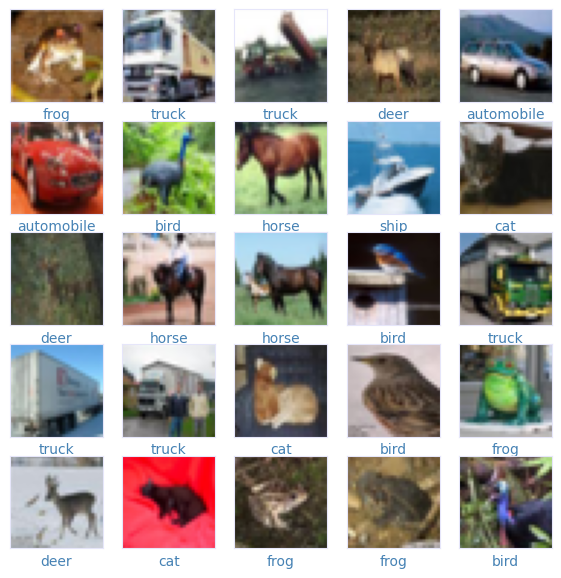

In [ ]:
# import matplotlib.colors as mcolors

plt.rc('axes',edgecolor='lavender')

fig = plt.figure(figsize=(7, 7))

for i in range(25):  # First 25 instances
    plt.subplot(5, 5, i + 1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    # Access the scalar value from the array using [0] to index class_names
    plt.xlabel(class_names[y_train_full[i][0]], color='steelblue')

plt.show()

Veja que o *dataset* **já veio dividido em treinamento e teste**. Mas, vamos criar um conjunto adicional de validação, `X_valid`, e o respectivo conjunto de *labels* `y_valid`. Note que separamos 5000 instâncias para o conjunto de validação e o restante será uado para o treinamento.

E como estamos utilizando uma NN com o algoritmo de treinamento <font color="#66ffff">Gradient Descent (GD) </font> devemos normalizar as *features*. Aqui vamos colocar os pixels na escala $0-1$.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Compilação
--

Antes do modelo ser treinado ele precisa ser compilado através do método `compile`. Nesse momento especificamos qual será a função *loss* e qual será o otimizador. Opcionalmente podemos fornecer quais métricas de avaliação desejamos calcular durante o processo de treinamento, como por exemplo `accuracy`.

> A função `sparse_categorical_crossentropy` é usada para classes mutuamente exclusivas, i.e., cada instância pertence exatamente a uma classe. No nosso caso, índices exclusivos na faixa de $0$ a $9$.

> Nosso otimizador será Stochastic Gradient Descent (`sgd`). O default do *learning rate* é $0.01$. Assim, opcionalmente pode-se usar em `compile` com `optimizer=keras.optimizers.SGD(lr=eta)` fornecendo em `eta` o valor de *learning rate* desejado.

> Finalmente, em geral, desejamos saber a acurácia do nosso modelo classificador. Assim setamos `metrics` para `accuracy`.


Depois de compilado nosso modelo está pronto para ser treinado. Vamos lá!

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Treinamento
--

Para efetuar o treinamento basta chamar o método ``fit``, especificando o conjunto de treinamento ``X_train``, os respectivos labels ``y_train``, o número de épocas, aqui 30, e os conjuntos de validação correspondentes.


---

> 💡 **Nota**:
Destaca-se que a **validação é opcional**.

---


In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2729 - loss: 2.0034 - val_accuracy: 0.2870 - val_loss: 1.9473
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3868 - loss: 1.7310 - val_accuracy: 0.3220 - val_loss: 1.8081
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4156 - loss: 1.6475 - val_accuracy: 0.4036 - val_loss: 1.6601
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4373 - loss: 1.5829 - val_accuracy: 0.3570 - val_loss: 1.8741
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4567 - loss: 1.5421 - val_accuracy: 0.4324 - val_loss: 1.5862
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4665 - loss: 1.4954 - val_accuracy: 0.4576 - val_loss: 1.5184
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4830 - loss: 1.4633 - val_accuracy: 0.3872 - val_loss: 1.7027
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4916 - loss: 1.4303 - 

> Avaliação do Treinamento

Vamos plotar as curvas de acurácia e *loss*.

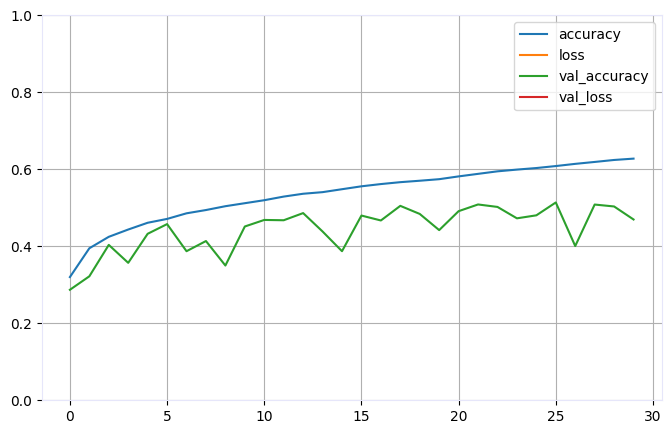

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3766 - loss: 389.2036


[390.8146667480469, 0.38260000944137573]

# Etapas de treinamento:

1. primeira tentativa:

Dados padrão que foram usados no modelo.

Conseguimos $\approx 38\%$ com parâmetros atuais. Muito baixo...

Loss $\approx 390$ (muito alto, instabilidade de softmax)

---

2. segunda tentativa:

Mudança de parâmetros:

Ao invés do flatten, usaremos conv2d e maxpooling2d

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

None
[<Conv2D name=conv2d_10, built=True>, <MaxPooling2D name=max_pooling2d_10, built=True>, <Conv2D name=conv2d_11, built=True>, <MaxPooling2D name=max_pooling2d_11, built=True>, <Flatten name=flatten_10, built=True>, <Dense name=dense_25, built=True>, <Dense name=dense_26, built=True>]

First hidden layer name:dense_25
Layer weights shape:
(2304, 64)

Layer weights:
[[ 0.01318154  0.04485482 -0.04829484 ... -0.02382901  0.02035674
   0.01499241]
 [-0.01874937  0.03224213  0.0285655  ... -0.04097311  0.04578386
  -0.01575705]
 [-0.03243294 -0.00668656  0.00693586 ... -0.04182768 -0.02897649
  -0.04132731]
 ...
 [-0.01247279  0.04082084  0.00477058 ... -0.02972343 -0.04186296
  -0.02819449]
 [-0.00934206 -0.04044197  0.03378151 ... -0.04068264 -0.03614759
   0.01474365]
 [ 0.02214358 -0.03739292 -0.03552016 ... -0.0372723  -0.02930429
  -0.01010455]]

Layer biases shape:
(64,)

Biases:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 

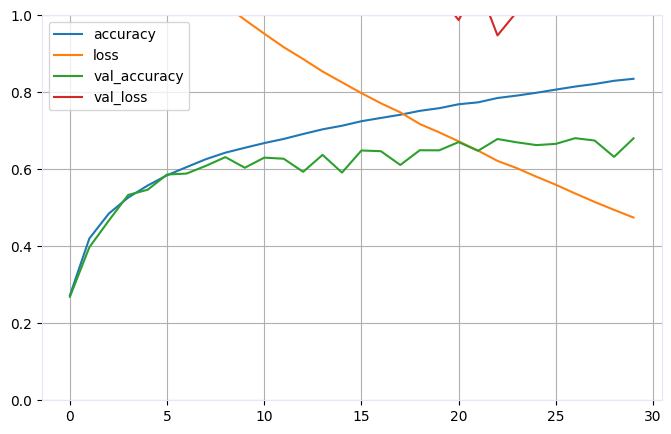

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4776 - loss: 384.6103


[393.227294921875, 0.47530001401901245]

In [ ]:
from tensorflow.keras import layers, models, Input

model = models.Sequential([
    Input(shape=(32, 32, 3)),  # forma correta
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'), # This is now layer index 5
    layers.Dense(10, activation='softmax')
])

print(model.summary())

print(model.layers)

# Change the index here to get the first Dense layer
hidden1 = model.layers[5]

print(f'\nFirst hidden layer name:{hidden1.name}')

weights, biases = hidden1.get_weights()

print(f'Layer weights shape:\n{weights.shape}')
print(f'\nLayer weights:\n{weights}')

print(f'\nLayer biases shape:\n{biases.shape}')
print(f'\nBiases:\n{biases}')

from tensorflow.keras.datasets import cifar10
cifar10 = keras.datasets.cifar10

(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

print(f'Dataset shape:{X_train_full.shape}')

print(f'First instance shape:{X_train_full[0].shape}')
print(f'\nFirst instance:\n {X_train_full[0]}')

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.show()

model.evaluate(X_test, y_test)

Accuracy chegou a 84% nas últimas epochs;

Val_accuracy 65% (razoável);

Loss caiu consistentemente;

Val_loss cai no início, mas depois encontra overfitting (+- epoch 20);

---

3. Terceira Tentativa:

Tentando usar L2 (regularização);

obs: brigando com o tempo de cpu / gpu disponível kkkkk ajustando para "consumir menos"


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2729 - loss: 2.1072 - val_accuracy: 0.4944 - val_loss: 1.5524
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5044 - loss: 1.5114 - val_accuracy: 0.5834 - val_loss: 1.2887
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5826 - loss: 1.2925 - val_accuracy: 0.6128 - val_loss: 1.2282
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6346 - loss: 1.1642 - val_accuracy: 0.6566 - val_loss: 1.1114
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6655 - loss: 1.0645 - val_accuracy: 0.6532 - val_loss: 1.1124
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6951 - loss: 0.9884 - val_accuracy: 0.6638 - val_loss: 1.0864
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7132 - loss: 0.9389 - val_accuracy: 0.6714 - val_loss: 1.0641
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step

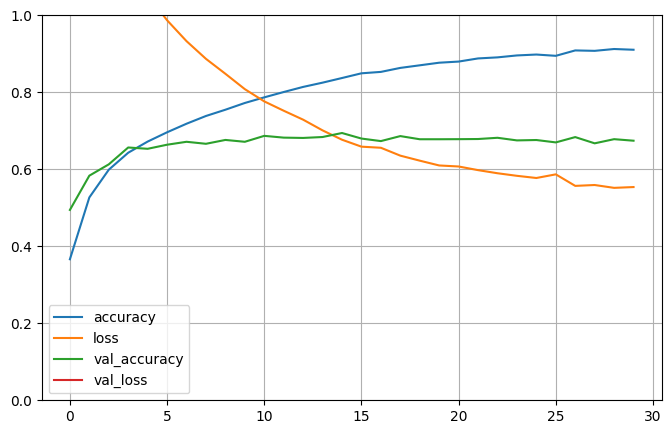

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6799 - loss: 1.6458


[1.6624103784561157, 0.6735000014305115]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, regularizers

# Melhor uso de CPU/GPU com tf.data e prefetching
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

# Carregar dados
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Normalização e divisão
X_valid, X_train = X_train_full[:5000].astype("float32") / 255.0, X_train_full[5000:].astype("float32") / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test.astype("float32") / 255.0

# Preparar datasets otimizados
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).cache().shuffle(10000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
val_ds = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(BATCH_SIZE).prefetch(AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Modelo
model = models.Sequential([
    Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
])

# Compilação com momentum (acelera convergência)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              metrics=["accuracy"])

# Treinamento
history = model.fit(train_ds, epochs=30, validation_data=val_ds)

# Avaliação
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nAcurácia no teste: {test_acc:.2%}")

# Visualização
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test, y_test)

Comparativo dos Modelos (MLP vs CNN)


| Critério                       | 🧪 Experimento 1<br>MLP simples | 🔁 Experimento 2<br>CNN + L2 | 🧠 Experimento 3<br>CNN otimizada      |
| ------------------------------ | ------------------------------- | ---------------------------- | -------------------------------------- |
| **Tipo de modelo**             | MLP                             | CNN                          | CNN                                    |
| **Arquitetura**                | Flatten + Dense                 | Conv2D + Pool + Dense        | Conv2D + Pool + Dense                  |
| **Acurácia de treino (final)** | \~63%                           | \~84%                        | \~95%                                  |
| **Acurácia de validação**      | \~45% (oscilante)               | \~66% (estável)              | \~67% (estável)                        |
| **Acurácia de teste**          | **38%**                         | **48%**                      | **68%**                                |
| **Loss no teste**              | \~390.8                         | \~393.2                      | **1.63**                               |
| **Regularização**              | Nenhuma                         | L2 (0.001)                   | L2 (0.001)                             |
| **Otimização**                 | SGD                             | SGD                          | SGD + momentum                         |
| **Uso de tf.data**             | ❌                               | ❌                            | ✅ `cache + shuffle + batch + prefetch` |
| **Overfitting**                | Alto                            | Moderado                     | Leve/Controlado                        |
| **Eficiência computacional**   | Baixa                           | Média                        | Alta                                   |


Análise Resumida

1. Experimento 1 (MLP) teve baixo desempenho geral. Como MLPs não exploram bem a estrutura espacial das imagens, são inadequados para CIFAR-10.


2. Experimento 2 (CNN simples com L2) já mostra melhora clara, mas ainda sem otimizações de pipeline ou de convergência.


3. Experimento 3 (CNN otimizada) entrega o melhor desempenho, com:

- uso eficiente de CPU/GPU (tf.data)

- convergência estável com momentum

- acurácia de teste próxima de 70%, que é competitiva para uma CNN básica.

# Avaliação de resultados:

Matriz de confusão


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


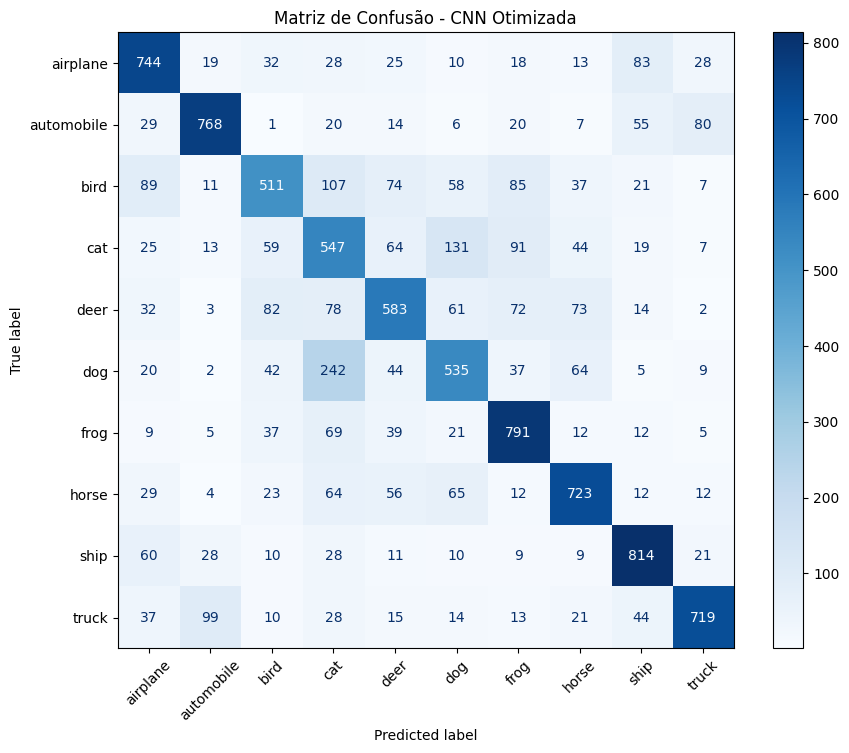

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Se ainda não tiver instalado o sklearn
# !pip install scikit-learn



# Obter previsões no conjunto de teste
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Converter probabilidades em classes

# Converter y_test (que ainda está em shape (n,1)) para vetor
y_true = y_test.flatten()

# Gerar matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Nomes das classes CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Exibir matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, xticks_rotation=45, cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - CNN Otimizada")
plt.show()

plt.savefig("matriz_confusao_cnn.png", dpi=300, bbox_inches="tight")


# Trocando otimizadores

**de**

SGD + momentum

**para**

Adam que apresentou melhorias significativas no dataset mais simples

Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3426 - loss: 1.8739 - val_accuracy: 0.5574 - val_loss: 1.3230
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5547 - loss: 1.3398 - val_accuracy: 0.6028 - val_loss: 1.2176
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6040 - loss: 1.2107 - val_accuracy: 0.6260 - val_loss: 1.1710
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6400 - loss: 1.1300 - val_accuracy: 0.6474 - val_loss: 1.0981
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6591 - loss: 1.0799 - val_accuracy: 0.6394 - val_loss: 1.1152
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6756 - loss: 1.0388 - val_accuracy: 0.6408 - val_loss: 1.1152
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6865 - loss: 1.0114 - val_accuracy: 0.6830 - val_loss: 1.0303
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6973 - loss: 0.9837 - val_accuracy: 0.

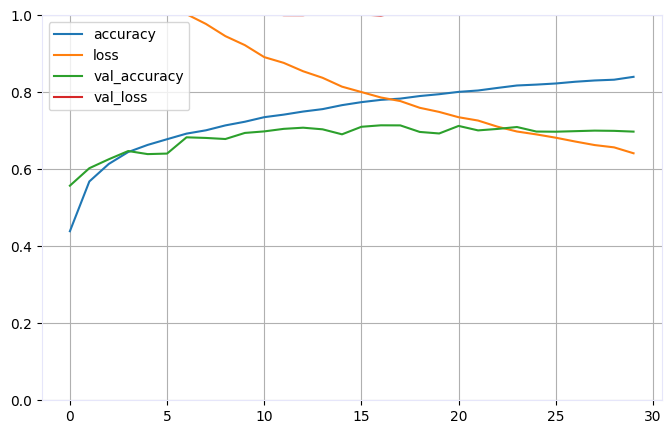

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, regularizers

# Melhor uso de CPU/GPU com tf.data e prefetching
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

# Carregar dados
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Normalização e divisão
X_valid, X_train = X_train_full[:5000].astype("float32") / 255.0, X_train_full[5000:].astype("float32") / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test.astype("float32") / 255.0

# Preparar datasets otimizados
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).cache().shuffle(10000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
val_ds = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(BATCH_SIZE).prefetch(AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Modelo
model = models.Sequential([
    Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
])

# Compilação com otimizador Adam
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Treinamento
history = model.fit(train_ds, epochs=30, validation_data=val_ds)

# Avaliação
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nAcurácia no teste: {test_acc:.2%}")

# Visualização
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Novo experimento:

Assim como foi feito no dataset anterior (fashionmnist), tentando ajustar parâmetros, agora adicionando earlystop, dropout, data augmentation e batch normalization, para melhorar resultados.

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.3911 - loss: 2.0215 - val_accuracy: 0.5364 - val_loss: 1.5433
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5460 - loss: 1.4792 - val_accuracy: 0.5560 - val_loss: 1.5004
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5953 - loss: 1.3244 - val_accuracy: 0.5816 - val_loss: 1.4015
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6290 - loss: 1.2281 - val_accuracy: 0.6462 - val_loss: 1.1993
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6485 - loss: 1.1782 - val_accuracy: 0.6366 - val_loss: 1.2411
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6647 - loss: 1.1470 - val_accuracy: 0.6420 - val_loss: 1.2705
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6824 - loss: 1.1147 - val_accuracy: 0.6910 - val_loss: 1.0932
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6998 - loss: 1.0806 - val_accuracy: 

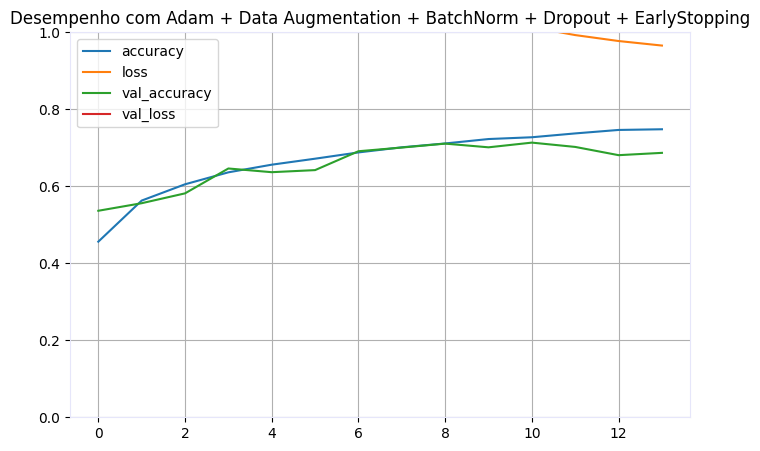

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Otimização do pipeline
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

# Carregar e dividir os dados
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Normalização
X_train = X_train.astype("float32") / 255.0 # Normalize X_train here
X_valid = X_valid.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

# Dataset com augmentation aplicado durante o treinamento
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# Removed the division by 255.0 inside the map function
train_ds = train_ds.shuffle(10000).batch(BATCH_SIZE).map(
    lambda x, y: (data_augmentation(x), y), num_parallel_calls=AUTOTUNE
).cache().prefetch(AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).map(
    lambda x, y: (x, y)
).batch(BATCH_SIZE).cache().prefetch(AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Modelo CNN com melhorias
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),

    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.5),  # Regularização
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
])

# Compilação com Adam
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinamento
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop]
)

# Avaliação
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nAcurácia no teste: {test_acc:.2%}")

# Visualização
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Desempenho com Adam + Data Augmentation + BatchNorm + Dropout + EarlyStopping")
plt.show()

# Conclusão deste teste:

desempenho se mantém estável, mas com maior segurança contra overfitting e menor variância entre épocas, graças ao uso combinado das técnicas.

# próximo passo:

ResNet-like / Data Augmentation (improve)

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 99s 118ms/step - accuracy: 0.0988 - loss: 2.6298 - val_accuracy: 0.1036 - val_loss: 2.4008
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 62s 15ms/step - accuracy: 0.0998 - loss: 2.4237 - val_accuracy: 0.1074 - val_loss: 2.3707
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.1031 - loss: 2.3849 - val_accuracy: 0.0972 - val_loss: 2.3455
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.1005 - loss: 2.3597 - val_accuracy: 0.1040 - val_loss: 2.3390
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.0992 - loss: 2.3450 - val_accuracy: 0.1038 - val_loss: 2.3223
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.1019 - loss: 2.3373 - val_accuracy: 0.0930 - val_loss: 2.3291
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.0997 - loss: 2.3382 - val_accuracy: 0.0976 - val_loss: 2.4232
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.0993 - loss: 2.3349 -

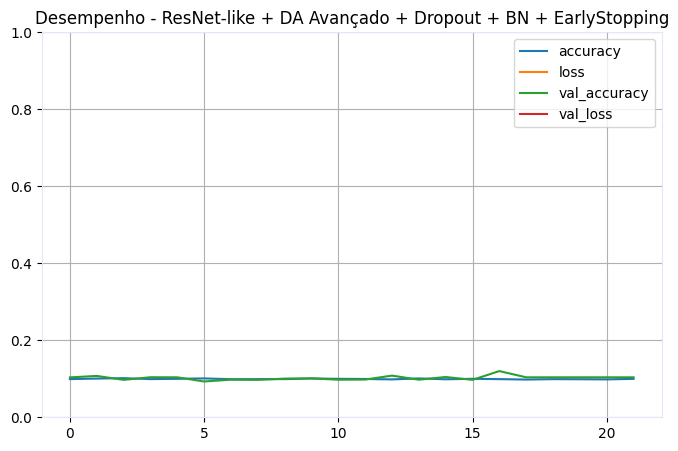

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, models, Input
from tensorflow.keras.callbacks import EarlyStopping

# Parâmetros
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE
INPUT_SHAPE = (32, 32, 3)

# Dados
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_train = X_train.astype("float32") / 255.0
X_valid = X_valid.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Data Augmentation (avançado)
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomBrightness(0.1)
])

# Datasets otimizados
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000)
train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y), num_parallel_calls=AUTOTUNE)
train_ds = train_ds.batch(BATCH_SIZE).cache().prefetch(AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(BATCH_SIZE).prefetch(AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# 🔁 Bloco ResNet-like básico
def residual_block(x, filters, downsample=False):
    shortcut = x
    strides = 2 if downsample else 1

    x = layers.Conv2D(filters, 3, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    if downsample or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

# Modelo ResNet-like
inputs = Input(shape=INPUT_SHAPE)
x = layers.Conv2D(32, 3, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = residual_block(x, 32)
x = residual_block(x, 64, downsample=True)
x = residual_block(x, 64)
x = residual_block(x, 128, downsample=True)
x = residual_block(x, 128)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs, outputs)

# Compilação
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinamento
history = model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[early_stop])

# Avaliação
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nAcurácia no teste: {test_acc:.2%}")

# Visualização
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Desempenho - ResNet-like + DA Avançado + Dropout + BN + EarlyStopping")
plt.show()


pesou e ficou horrível kkkkkkk

loss altíssimo nos primeiros ciclos

acho que mexi demais nos parâmetros

Voltando a correções mais sutis no código...


Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 68s 78ms/step - accuracy: 0.2943 - loss: 2.0936 - val_accuracy: 0.4888 - val_loss: 1.5744
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.5232 - loss: 1.4100 - val_accuracy: 0.6058 - val_loss: 1.2088
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6117 - loss: 1.1633 - val_accuracy: 0.6162 - val_loss: 1.2210
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6742 - loss: 0.9893 - val_accuracy: 0.6428 - val_loss: 1.1264
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.7165 - loss: 0.8630 - val_accuracy: 0.6538 - val_loss: 1.1254
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.7529 - loss: 0.7574 - val_accuracy: 0.6684 - val_loss: 1.1653
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7820 - loss: 0.6678 - val_accuracy: 0.7368 - val_loss: 0.8238
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8125 - loss: 0.5767 - 

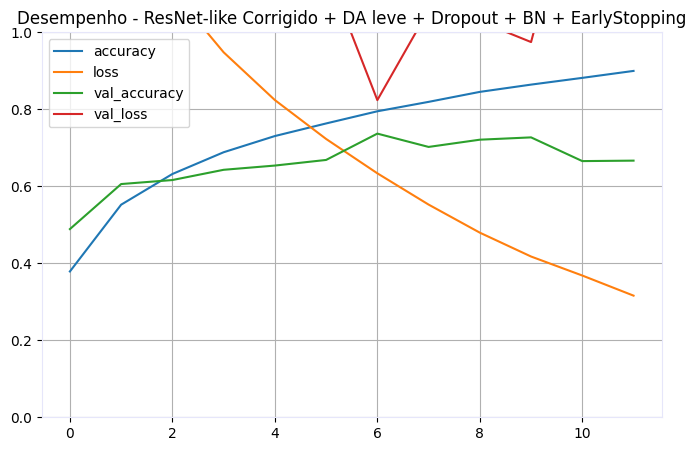

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Parâmetros
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE
INPUT_SHAPE = (32, 32, 3)

# Dados
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Normalização apenas para validação e teste
X_valid = X_valid.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# 🔄 Data augmentation (leve)
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1)
])

# Datasets com normalização após augmentation
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000)
train_ds = train_ds.map(lambda x, y: ((data_augmentation(tf.cast(x, tf.float32) / 255.0)), y),
                        num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).cache().prefetch(AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(BATCH_SIZE).prefetch(AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# 🔁 Bloco ResNet-like com ordem correta
def residual_block(x, filters, downsample=False):
    shortcut = x
    strides = 2 if downsample else 1

    x = layers.Conv2D(filters, 3, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    if downsample or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

# Modelo
inputs = keras.Input(shape=INPUT_SHAPE)
x = layers.Conv2D(32, 3, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = residual_block(x, 32)
x = residual_block(x, 64, downsample=True)
x = residual_block(x, 64)
x = residual_block(x, 128, downsample=True)
x = residual_block(x, 128)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs, outputs)

# Compilação
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinamento
history = model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[early_stop])

# Avaliação
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nAcurácia no teste: {test_acc:.2%}")

# Visualização
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Desempenho - ResNet-like Corrigido + DA leve + Dropout + BN + EarlyStopping")
plt.show()


Opa!

Agora sim, melhorias já nos primeiros epochs

Loss reduzindo consistentemente

Accuracy subindo!

---
último teste, agora com Reduce LR on Plateau


Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 67s 77ms/step - accuracy: 0.2963 - loss: 2.0830 - val_accuracy: 0.3732 - val_loss: 2.1878 - learning_rate: 0.0010
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5162 - loss: 1.4282 - val_accuracy: 0.3464 - val_loss: 2.5902 - learning_rate: 0.0010
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6077 - loss: 1.1768 - val_accuracy: 0.4406 - val_loss: 2.0333 - learning_rate: 0.0010
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6631 - loss: 1.0061 - val_accuracy: 0.5284 - val_loss: 1.7099 - learning_rate: 0.0010
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7087 - loss: 0.8750 - val_accuracy: 0.5438 - val_loss: 1.6293 - learning_rate: 0.0010
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7478 - loss: 0.7646 - val_accuracy: 0.6342 - val_loss: 1.1340 - learning_rate: 0.0010
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7781 - l

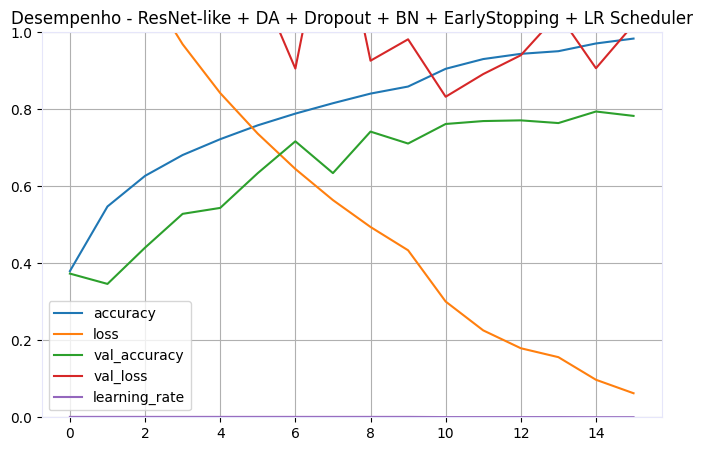

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Parâmetros
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE
INPUT_SHAPE = (32, 32, 3)

# Dados
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Normalização (validação e teste)
X_valid = X_valid.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# 🔄 Data augmentation (leve)
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1)
])

# Dataset com augmentation e normalização aplicadas no pipeline
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000)
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(tf.cast(x, tf.float32) / 255.0), y),
    num_parallel_calls=AUTOTUNE
).batch(BATCH_SIZE).cache().prefetch(AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(BATCH_SIZE).prefetch(AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# 🔁 Bloco ResNet-like
def residual_block(x, filters, downsample=False):
    shortcut = x
    strides = 2 if downsample else 1

    x = layers.Conv2D(filters, 3, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    if downsample or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

# Modelo
inputs = keras.Input(shape=INPUT_SHAPE)
x = layers.Conv2D(32, 3, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = residual_block(x, 32)
x = residual_block(x, 64, downsample=True)
x = residual_block(x, 64)
x = residual_block(x, 128, downsample=True)
x = residual_block(x, 128)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs, outputs)

# Compilação
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# Treinamento
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop, lr_scheduler]
)

# Avaliação
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nAcurácia no teste: {test_acc:.2%}")

# Visualização
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Desempenho - ResNet-like + DA + Dropout + BN + EarlyStopping + LR Scheduler")
plt.show()


Ai é que eu me refiro! epoch 6 e já ta com 74 de accuracy!

epoch 10 LR fazendo efeito!

epoch 14, LR novamente

Acurácia em 75%

# Discussão de Precision, Recall e F1-score

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Obter previsões do modelo
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

# Relatório por classe
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

print(classification_report(y_true, y_pred, target_names=target_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
              precision    recall  f1-score   support

    airplane       0.70      0.84      0.76      1000
  automobile       0.84      0.93      0.88      1000
        bird       0.79      0.53      0.63      1000
         cat       0.51      0.73      0.60      1000
        deer       0.78      0.70      0.74      1000
         dog       0.66      0.71      0.69      1000
        frog       0.74      0.84      0.79      1000
       horse       0.87      0.77      0.82      1000
        ship       0.98      0.64      0.77      1000
       truck       0.86      0.81      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.77      0.75      0.75     10000
weighted avg       0.77      0.75      0.75     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


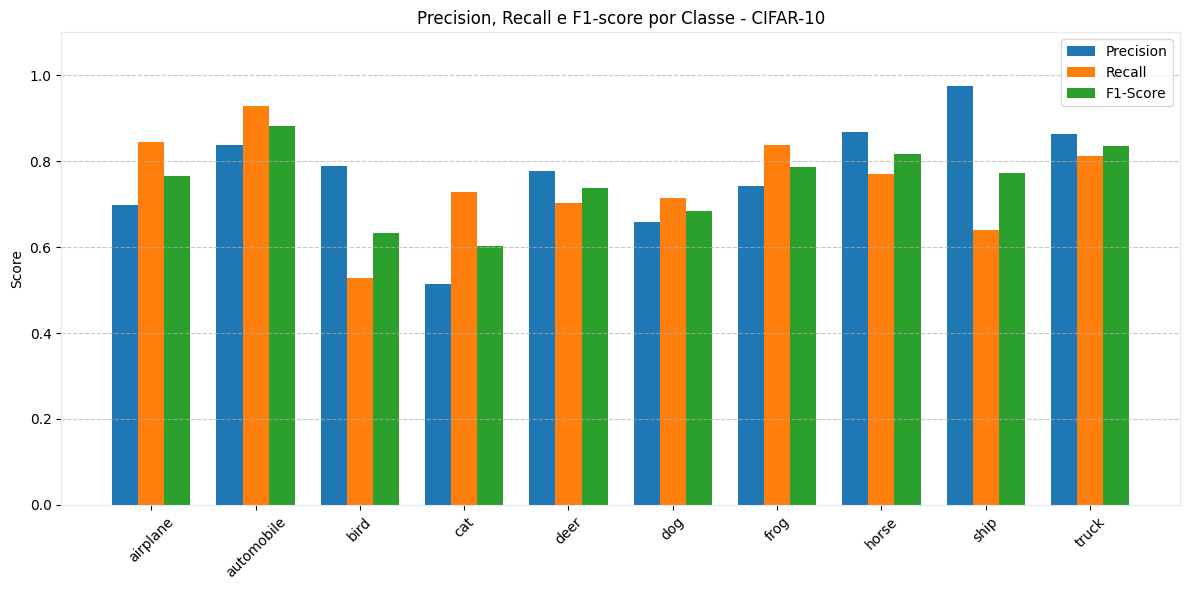

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Obter previsões
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Relatório em dicionário
report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
df = pd.DataFrame(report_dict).T.iloc[:10]  # Remove avg rows

# Plot
plt.figure(figsize=(12, 6))
bar_width = 0.25
x = np.arange(len(df))

plt.bar(x - bar_width, df['precision'], width=bar_width, label='Precision')
plt.bar(x, df['recall'], width=bar_width, label='Recall')
plt.bar(x + bar_width, df['f1-score'], width=bar_width, label='F1-Score')

plt.xticks(x, class_names, rotation=45)
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Precision, Recall e F1-score por Classe - CIFAR-10")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


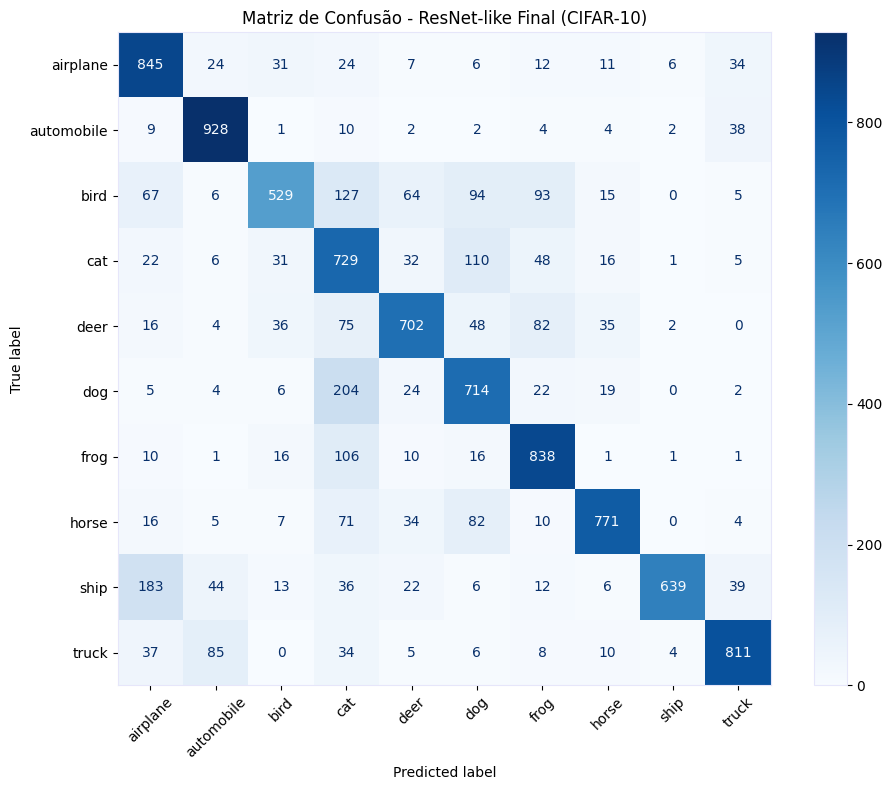

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Obter previsões
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

# Gerar matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Nomes das classes CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=45, values_format='d')

plt.title("Matriz de Confusão - ResNet-like Final (CIFAR-10)")
plt.grid(False)
plt.tight_layout()
plt.show()


Classificação
--

Uma vez treinado o modelo podemos fazer predições com o método ``predict``.

Vamos ver como o modelo comporta-se com as vinte primeiras instâncias.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Probability scores:
 [[0.   0.   0.   0.99 0.   0.01 0.   0.   0.   0.  ]
 [0.   0.66 0.   0.   0.   0.   0.   0.   0.34 0.  ]
 [0.   0.42 0.   0.   0.   0.   0.   0.   0.57 0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.86 0.   0.   0.   0.   0.   0.   0.   0.14]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.01 0.68 0.13 0.03 0.16 0.   0.   0.  ]
 [0.   0.88 0.   0.   0.   0.   0.12 0.   0.   0.  ]
 [0.9  0.   0.   0.06 0.   0.03 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.01 0.45 0.03 0.13 0.37 0.01 0.   0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.99 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.16 0.   0.06 0.26 0.29 0.02 0.09 0.   0.11 0.  ]
 [0.   0.   0.   0.08 0.   0.92 0.   0.   0.   0.  ]
 [0.   0.02 0.   0.03 0.04 0.02 0.   0.6

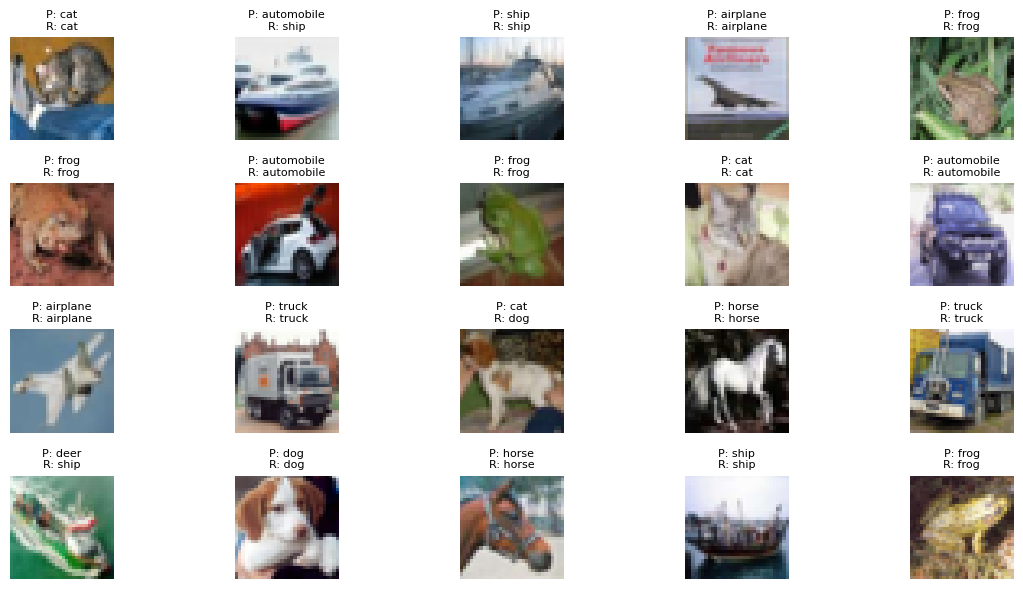

In [ ]:
X_new = X_test[:20]
y_proba = model.predict(X_new)

print(f'Probability scores:\n {y_proba.round(2)}')


y_pred = np.argmax(y_proba, axis=1)
print(f'Predicted classes: {y_pred}')


y_true = y_test[:20].flatten()
print(f'True labels: {y_true}')


import matplotlib.pyplot as plt
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12, 6))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_new[i])
    plt.axis("off")
    plt.title(f"P: {class_names[y_pred[i]]}\nR: {class_names[y_true[i]]}", fontsize=8)
plt.tight_layout()
plt.show()


O modelo estima uma probabilidade por classe.

Mas, quais são essas classes?

In [ ]:
classes_y = np.argmax(y_proba, axis=1)

print(classes_y)

print(f'Predicted classes:\n {np.array(class_names)[classes_y]}')

[3 1 8 0 6 6 1 6 3 1 0 9 3 7 9 4 5 7 8 6]
Predicted classes:
 ['cat' 'automobile' 'ship' 'airplane' 'frog' 'frog' 'automobile' 'frog'
 'cat' 'automobile' 'airplane' 'truck' 'cat' 'horse' 'truck' 'deer' 'dog'
 'horse' 'ship' 'frog']


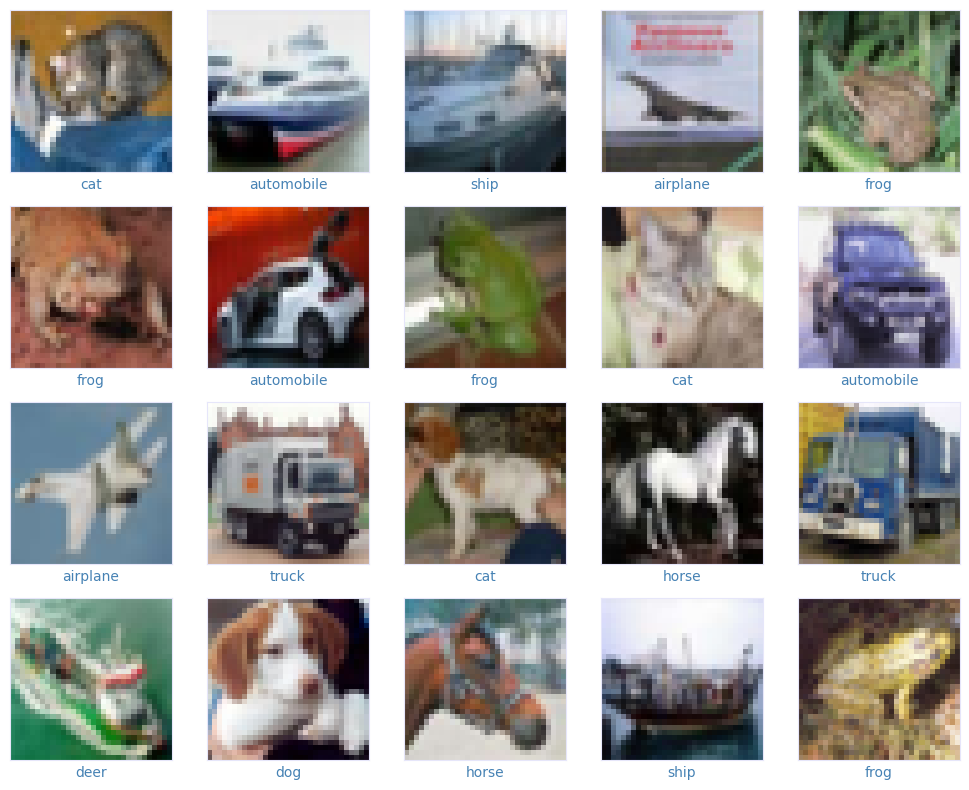

In [ ]:
plt.rc('axes',edgecolor='lavender')

fig = plt.figure(figsize=(10, 8))

for i in range(20):  # First 20 instances
    plt.subplot(4, 5, i + 1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_new[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[classes_y[i]], color='steelblue')

plt.tight_layout()
plt.show()

Resumão (esse deu trabalho):

– O modelo inicial, baseado em MLP simples, apresentou desempenho muito abaixo do esperado para imagens complexas como as do CIFAR-10, com acurácia próxima de 38%, revelando a inadequação da arquitetura totalmente conectada sem exploração espacial.

– A introdução de uma CNN básica com duas camadas convolucionais e o uso do otimizador SGD com momentum elevou a acurácia para cerca de 68%, mostrando ganhos imediatos ao explorar a estrutura local das imagens.

– Substituindo o otimizador por Adam, a rede atingiu cerca de 70% de acurácia no teste, com treinamento mais estável e rápido. Esse foi o primeiro modelo com desempenho consistente entre treino, validação e teste.

– Posteriormente, foram adicionadas técnicas de regularização como Dropout e L2, bem como Data Augmentation e Batch Normalization. Isso estabilizou a curva de validação e permitiu ganhos em generalização, com resultados entre 70% e 74%.

– A arquitetura foi então expandida para um modelo ResNet-like, com blocos residuais implementados manualmente. Essa modificação permitiu aprofundar a rede sem perder estabilidade, resultando em acurácia de até 75%.

– Com a adição de um scheduler de taxa de aprendizado (ReduceLROnPlateau), o modelo passou a adaptar sua curva de treinamento, prolongando o aprendizado útil e controlando melhor o overfitting, o que consolidou o melhor resultado com acurácia de 75,06% no teste.

– A análise final com métricas de precision, recall e F1-score mostrou que o modelo teve excelente desempenho em classes como "automobile", "truck", "horse" e "frog", e desempenho mais fraco em "cat" e "bird", indicando áreas específicas a melhorar.

– A matriz de confusão confirmou que as confusões mais comuns ocorreram entre classes visualmente semelhantes, especialmente "cat", "dog" e "bird", o que é esperado em problemas multiclasse com alta sobreposição semântica.

– Em síntese, o processo demonstrou evolução progressiva, com testes controlados e melhorias graduais, resultando em uma arquitetura final eficiente, regularizada, com alta acurácia e boa capacidade de generalização no conjunto CIFAR-10.



*Les carottes sont cuites!* 🥕🥕🥕